# Final Project: Analyzing Breast Cancer Data

Rebeca Rodriguez

-

Aurelien Meray

-

Joel Adams

In [0]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.utils.fixes import signature

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

cwd = os.getcwd()
print(cwd)
f = open("/content/gdrive/My Drive/Spring 2019 (Senior)/IDH - Data Analytics/Project Data/data.csv")

/content


In [0]:
os.chdir('/content/gdrive/My Drive/Spring 2019 (Senior)/IDH - Data Analytics/Project Data')

In [0]:
# Read the data
cancer_data = pd.read_csv('data.csv')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Our output variable is the column titled 'diagnosis.' This tells us if a tumor is malignant (M) or benign (B).

In [0]:
print('Table column labels:\n', cancer_data.columns) 
print('\n\nNumber of columns:\t', cancer_data.shape[1])
print('Number of rows:\t', cancer_data.shape[0])

Table column labels:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


Number of columns:	 33
Number of rows:	 569


Following our output variable are 30 different columns, each providing some new information about the tumor, such as radius mean and texture mean. We want to drop the column titled 'id' because it is unnecessary noise. We are not concerned about the individual id's of each tumor.

In [0]:
print()
cancer_data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The series above shows that the column labeled 'Unnamed:32' has 569 null rows. Since there are a total of 569 rows in the entire table, this means all values are null. We will remove this column.

In [0]:
# Drop the two columns
cancer_data = cancer_data.drop(['Unnamed: 32', 'id'], axis = 1)
cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
# Split data into output and input variables
x = cancer_data.iloc[:,1:30]
y = cancer_data.iloc[:,0]
# Split data into testing and training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# Histogram

A histogram is a plot that helps visualize the underlying frequency of the data. It is useful because it shows you the raw values of the data. It helps to detect outliers.

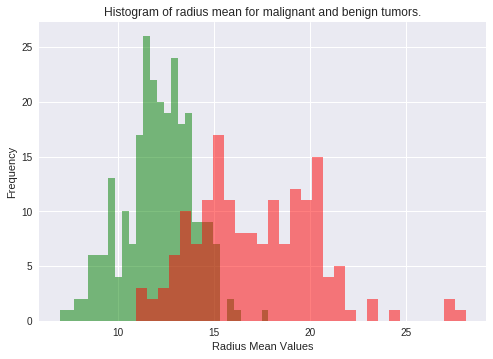

In [0]:
# Convert series object to dataframe
y_frame = y_train.to_frame()
# Separate benign and malignant results
y_benign = x_train[y_frame.diagnosis == 'B']
y_malignant = x_train[y_frame.diagnosis == 'M']
plot_benign = plt.hist(y_benign.radius_mean, bins = 30, fc = (0,1,0,0.5),facecolor='green',alpha = 0.5, label = 'Benign')
plot_malignant = plt.hist(y_malignant.radius_mean, bins = 30, fc = (0.5,0,0.5,0.5),facecolor='red',alpha = 0.5, label = 'Malignant')
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of radius mean for malignant and benign tumors.")
plt.show()

In the plot it is shown that the average value of the radius mean is higher for malignant tumors than benign tumors. Benign tumors' radius mean values seem to follow a gaussian distribution.

# Violin Plots

Violin plots are used to visualize the probability density of data.
We chose to visualize the first ten features only. The first ten features are the mean values of different categories.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:637: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:885: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:905: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


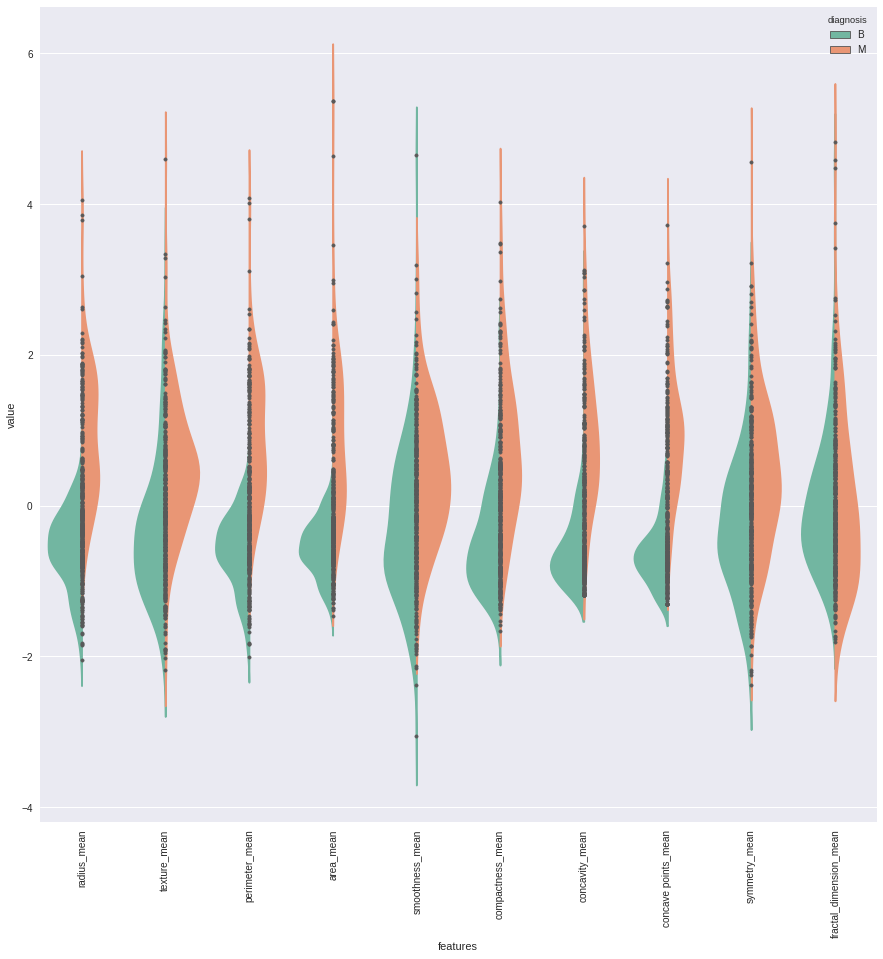

In [0]:
# Violin plots of first ten values
standardized_vars = (x_train - x_train.mean()) / x_train.std()
sns.set(style = 'darkgrid')
table = pd.concat([y_frame, standardized_vars.iloc[:,0:10]], axis = 1)
table = pd.melt(table, id_vars = ['diagnosis'], var_name = ['features'], value_name = 'value')
plt.figure(figsize = (15,15))
sns.violinplot(x = 'features', y = 'value', hue = 'diagnosis', data = table, split = True, inner = 'point', palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

# Box and Swarm Plot

A box plot is useful for visualizing data. It shows the first quartile, median, and third quartile of data. It is useful for detecting outliers, and shows how tightly data is grouped.

We chose to visualize figures 11- 20. These are the standard error set.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

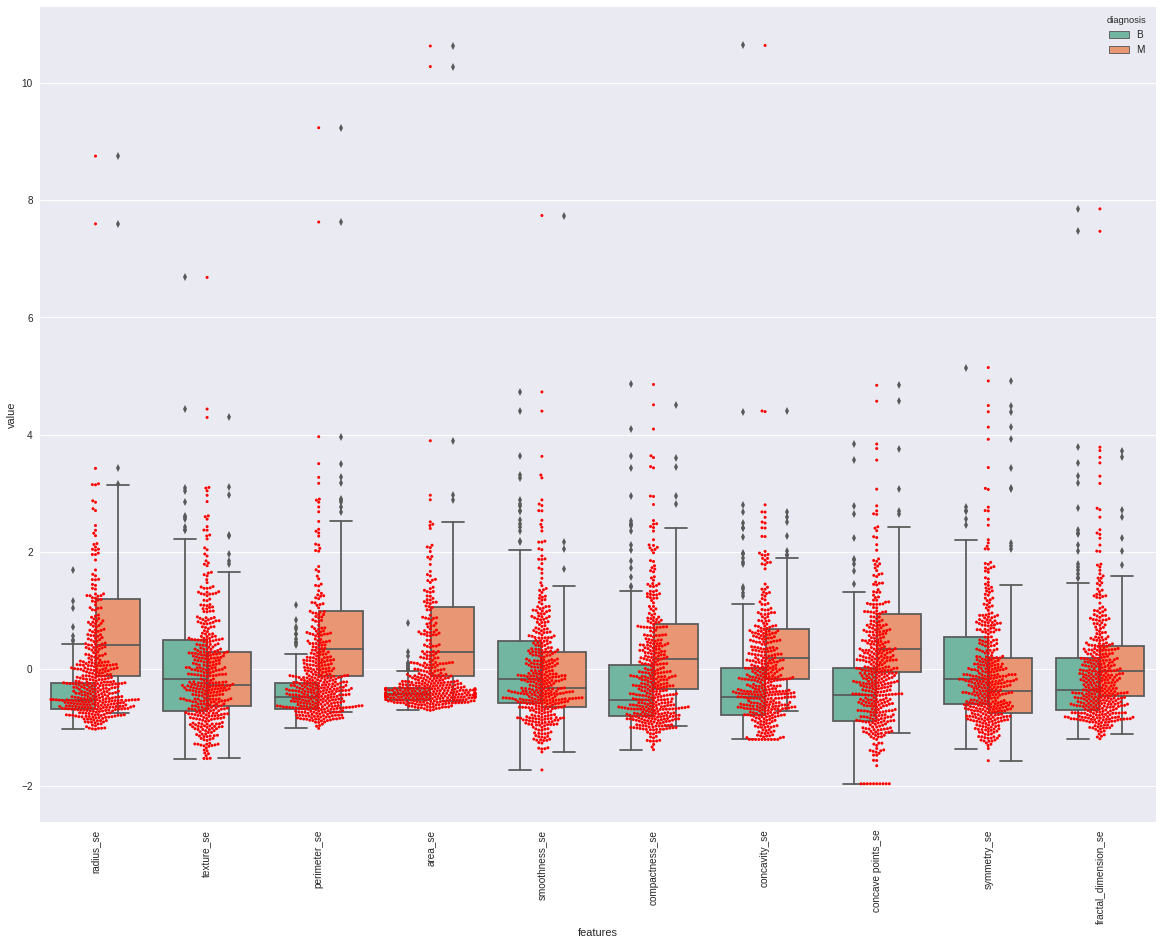

In [0]:
plt.figure(figsize = (20,15))
sns.set(style = 'darkgrid')
table2 = pd.concat([y_frame, standardized_vars.iloc[:,10:20]], axis = 1)
table2 = pd.melt(table2, id_vars = ['diagnosis'], var_name = ['features'], value_name = 'value')
ax = sns.swarmplot(x = 'features', y = 'value', data = table2, color="red", edgecolor="gray", size =3)
ax = sns.boxplot(x = 'features', y = 'value', hue = 'diagnosis', data = table2, palette = 'Set2')
plt.xticks(rotation = 90)

We chose to have a dark gridded background because the outliers made it so that there was a lot of white space. Without the grids it would be easy to get lost in all the whitespace and it would be more difficult to visualize which outliers belong to which features.

Most of the features have higher medians for malignant tumors than benign tumors.

The Swarm plot in red is to show more detail on the distribution of each feature.

# Strip Plots

Strip plots are a useful view of the raw data. It helps to see how the points are distributed.
We have shown the last 10 features of the data. These are the 'worst' or lagest mean values for each tumor.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

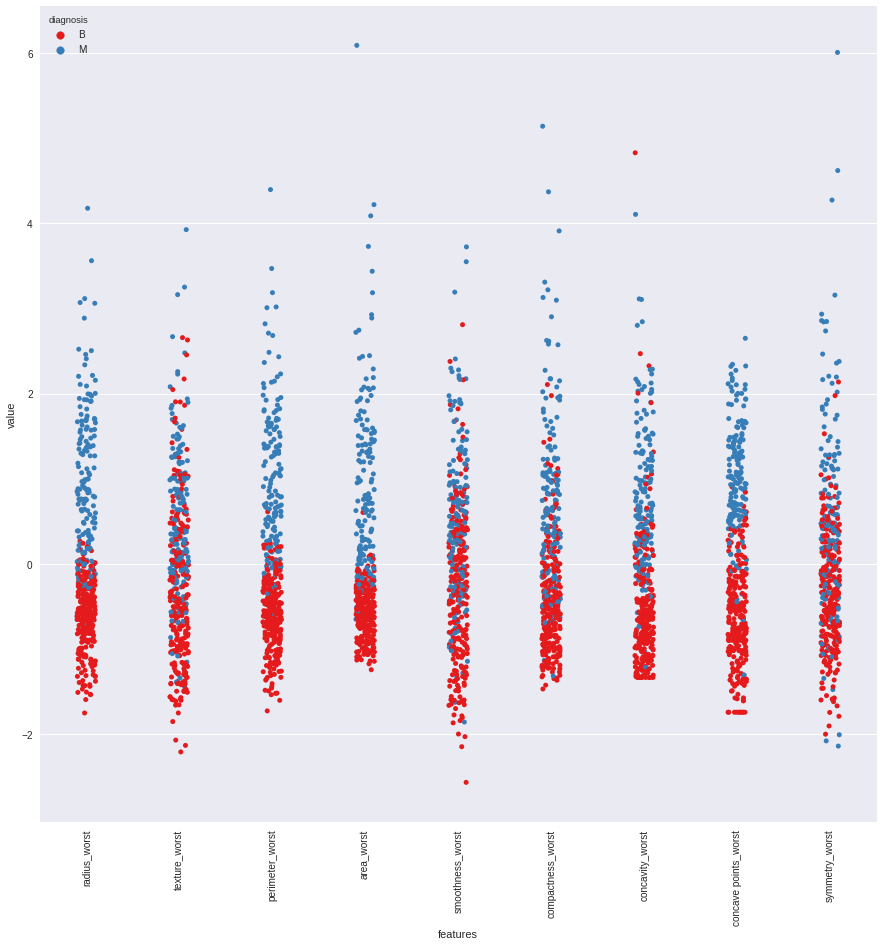

In [0]:
plt.figure(figsize = (15,15))
table3 = pd.concat([y_frame, standardized_vars.iloc[:,20:35]], axis = 1)
table3 = pd.melt(table3, id_vars = ['diagnosis'], var_name = ['features'], value_name = 'value')
sns.stripplot(x = 'features', y = 'value', hue = 'diagnosis', data = table3, palette = 'Set1', jitter = True)
plt.xticks(rotation = 90)

# Prediction and Feature Selection Using Random Forest Classification

Random forest is a supervised learning algorithm that is useful for both regression and classification problems. Since our goal in this project is to predict whether a tumor is malignant or benign, this is a classification problem.

Random forest classification is good because it is not prone to overfitting and it is easy to interpret. Since we are beginners in machine learning these qualities are important to us.

Random forests consists of many decision trees. Each decision tree is built over a random extraction of the observations from the data (a random tumor) and a random extraction of the features (ie one decision tree can use features compactness_worst, texture_se, and perimeter_mean). Not every tree sees all the features and all the observations. This is what makes the decision trees less prone to overfitting.

The importance of each feature is determined by how pure a tree is.The more a feature decreases the impurity, the more important the feature is.

Since this is a classification problem, the impurity is measured by the Gini impurity or the information gain.

In [0]:
#Create random trees model instance
random_trees = RandomForestClassifier(n_estimators = 150) #150 trees will be generated
random_trees.fit(x_train, y_train)

#Rank the most important features
importantFeatures = random_trees.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_trees.estimators_], axis = 0)
indices = np.argsort(importantFeatures)[::-1]
print('Most Important Features, Ranked:\n')
for f in range(x_train.shape[1] - 1):
    print("%d. Feature #%d | (Name: %s)(%f)" %  (f + 1, indices[f], x_train.columns[indices[f] - 1],importantFeatures[indices[f]]))
    #print('Name:\t',x_train.columns[indices[f] - 1],'\n')

Most Important Features, Ranked:

1. Feature #27 | (Name: concavity_worst)(0.146170)
2. Feature #22 | (Name: texture_worst)(0.143826)
3. Feature #23 | (Name: perimeter_worst)(0.113904)
4. Feature #20 | (Name: fractal_dimension_se)(0.111214)
5. Feature #7 | (Name: concavity_mean)(0.073284)
6. Feature #3 | (Name: perimeter_mean)(0.060090)
7. Feature #26 | (Name: compactness_worst)(0.050077)
8. Feature #13 | (Name: perimeter_se)(0.038468)
9. Feature #6 | (Name: compactness_mean)(0.037227)
10. Feature #0 | (Name: symmetry_worst)(0.037203)
11. Feature #2 | (Name: texture_mean)(0.031650)
12. Feature #12 | (Name: texture_se)(0.019151)
13. Feature #21 | (Name: radius_worst)(0.016712)
14. Feature #25 | (Name: smoothness_worst)(0.015055)
15. Feature #28 | (Name: concave points_worst)(0.014477)
16. Feature #1 | (Name: radius_mean)(0.013430)
17. Feature #10 | (Name: fractal_dimension_mean)(0.013039)
18. Feature #24 | (Name: area_worst)(0.011176)
19. Feature #4 | (Name: area_mean)(0.008229)
20. Fea

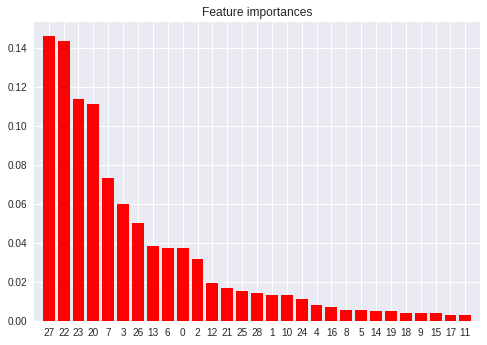

In [0]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importantFeatures[indices], color='red',
        align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.ylim(0)
plt.show()

In [0]:
x_train_select = x_train.filter(items = ['texture_worst','concavity_worst','fractal_dimension_se', 'concavity_mean', 'perimeter_worst', 'texture_mean', 'compactness_mean', 'perimeter_mean', 'perimeter_se','symmetry_worst'])

In [0]:
#Here are the top 10 selected features
x_train_select.head()

,texture_worst,concavity_worst,fractal_dimension_se,concavity_mean,perimeter_worst,texture_mean,compactness_mean,perimeter_mean,perimeter_se,symmetry_worst
322,21.08,0.1791,0.003107,0.03800,92.80,13.32,0.08834,82.82,1.614,0.2382
149,22.46,0.1564,0.001976,0.02881,97.19,17.91,0.06376,88.12,1.573,0.2350
491,18.42,0.1048,0.001309,0.04445,127.10,13.23,0.06217,114.60,3.163,0.1783
171,29.87,0.2644,0.001868,0.05858,116.60,19.63,0.06288,85.84,3.142,0.2884
146,26.38,0.4504,0.004635,0.16590,91.93,16.58,0.17000,78.99,2.281,0.5774


# Model Prediction

In [0]:
y_pred = random_trees.predict(x_test)

# Model Evaluation

To Evaluate the model, we used 4 different methods: confusion matrix, accuracy score, precision score, and the precision-recall curve

In [0]:
# Accuracy
acc =  accuracy_score(y_test,y_pred) 
print('Accuracy score is:\t',acc)

Accuracy score is:	 0.951048951048951


We decided accuracy was a good metric to use because the data is balanced. Accuracy is the ratio of correct predictions to the total observation.

Number of benign tumors:	 261 
Number of malignant tumors:	 165


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


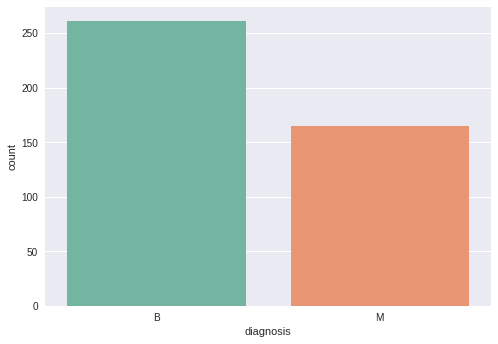

In [0]:
# Proof of balanced data:
ax = sns.countplot(y_train, label = 'count', palette= 'Set2')
B, M = y_train.value_counts()
print('Number of benign tumors:\t',B,'\nNumber of malignant tumors:\t',M)

Confusion Matrix:



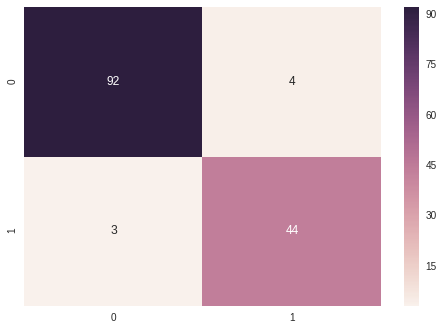

In [0]:
# Confusion matrix

cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:\n')
sns.heatmap(cm, annot = True, fmt = 'd')

## Confusion Matrix Meaning

![#Diagram of Confusion Matrixt](https://cdn-images-1.medium.com/max/1600/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)

When trying to predict the y test set, we correctly classified 85 tumors as benign and correctly classified 52 tumors as malignant. We incorrectly classified 4 benign tumors as malignant (type 2 error) and 2 malignant tumors as benign (type 1 error).

In the future we would focus on lowering the type 1 errors as much as possible in order to ensure all malignant tumors get treated as early as possible.

In [0]:
y_recall = recall_score(y_test,y_pred, average = 'micro') 
print('Precision score is:\t', y_recall)

Precision score is:	 0.951048951048951


Recall is the ratio of correctly classified malignant tumors to all malignant tumors.

In [0]:
y_score = random_trees.predict_proba(x_test)
y_score = y_score[:,1]

In [0]:
y_test_binary = []
for stuff in y_test:
    if stuff == 'M':
        stuff = 1
    else:
        stuff = 0
    y_test_binary.append(stuff)

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.98')

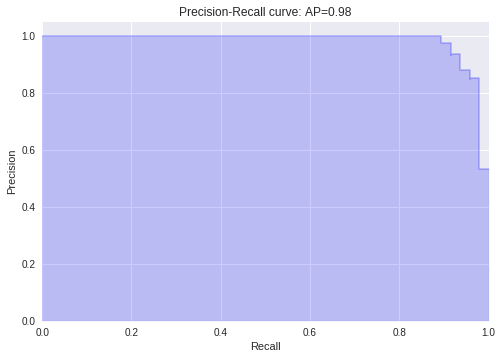

In [0]:
precision, recall, _ = precision_recall_curve(y_test_binary, y_score)

average_y_precision = average_precision_score(y_test_binary, y_score)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_y_precision))

The Precision-recall curve computes the precision-recall pairs for different probability thresholds.

#Thank you!